In [1]:
import sys, os

MARIPOSA_PATH = "/home/yizhou7/mariposa/"

sys.path.append(MARIPOSA_PATH + "src")
os.chdir(MARIPOSA_PATH)

from utils.plot_utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from benchmark_consts import *
from utils.analysis_utils import *

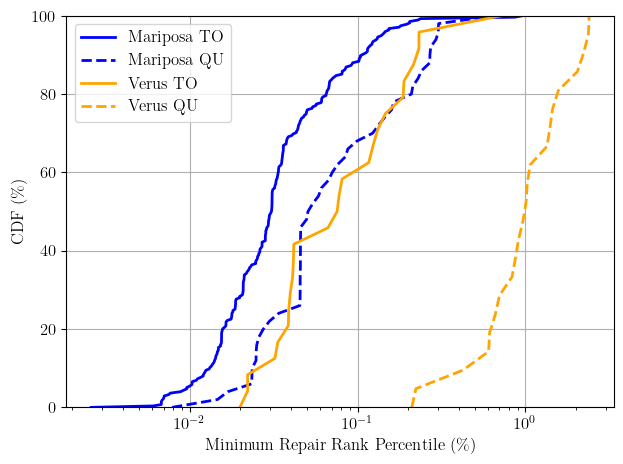

In [17]:
def get_ratios(qunat_count, round_1_fixes):
    to_dps = []
    ff_dps = []

    for q, (total, ignored) in qunat_count.items():
        if q in round_1_fixes:
            fixes = round_1_fixes[q]
            is_ff = True
            min_fix = total
            for f, r in fixes.items():
                if "timeout_" in f:
                    is_ff = False
                min_fix = min(min_fix, r)
            if min_fix == -1:
                continue
            if is_ff:
                ff_dps.append((total, ignored, min_fix))
            else:
                to_dps.append((total, ignored, min_fix))

    to_dps = np.array(to_dps)
    ff_dps = np.array(ff_dps)
    # min_repair_rank_percentile = dps[:,2]/dps[:,0]
    return to_dps[:,2]*100/to_dps[:,0], ff_dps[:,2]*100/ff_dps[:,0]

mp_to, mp_ff = get_ratios(MARIPOSA_QUNAT_COUNT, mariposa_rd1_ranks)
mp_to = PartialCDF(mp_to)
mp_ff = PartialCDF(mp_ff)

plt.plot(mp_to.xs, mp_to.ys, color=BENCH_COLORS["mariposa"], label="Mariposa TO", linewidth=2)
plt.plot(mp_ff.xs, mp_ff.ys, color=BENCH_COLORS["mariposa"], label="Mariposa QU", linestyle="--",  linewidth=2)

vu_to, vu_ff = get_ratios(VERUS_QUNAT_COUNT, verus_rd1_ranks)
vu_to = PartialCDF(vu_to)
vu_ff = PartialCDF(vu_ff)

plt.plot(vu_to.xs, vu_to.ys, color=BENCH_COLORS["verus"], label="Verus TO", linewidth=2)
plt.plot(vu_ff.xs, vu_ff.ys, color=BENCH_COLORS["verus"], label="Verus QU", linestyle="--", linewidth=2)

plt.xlabel("Minimum Repair Rank Percentile (\%)")
plt.ylabel("CDF (\%)")
plt.ylim(0, 100)
handles, labels = plt.gca().get_legend_handles_labels()
# additional_legend = plt.Line2D([], [], color='grey', linestyle='--', label='With Filter')
# handles.append(additional_legend)
# labels.append('With Filter')
plt.legend(handles=handles, labels=labels)
plt.grid()

plt.xscale("log")
# plt.show()
plt.tight_layout()
plt.savefig("fig/debugger/repair_rank_percentile_cdf.pdf", dpi=300)